<a href="https://colab.research.google.com/github/rishijain544/customer_churn_prediction/blob/main/customer_churn_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('/content/Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [8]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [9]:
df.drop(columns=['RowNumber','CustomerId','Surname'], inplace=True)

In [10]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [12]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [13]:
X=df.drop(columns=['Exited'])
y=df['Exited']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=2,random_state=1)

In [14]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [15]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [16]:
X_train.shape

(9998, 11)

In [17]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [18]:
X_train_scaled

array([[-1.23676019,  0.29353011, -1.04191108, ..., -0.57881318,
        -0.57388544, -1.09578666],
       [ 0.61523625, -0.46925336,  1.03271175, ...,  1.72767315,
        -0.57388544,  0.9125864 ],
       [-1.11260401, -0.85064509,  0.3411708 , ...,  1.72767315,
        -0.57388544,  0.9125864 ],
       ...,
       [ 0.22207499,  0.57957391,  1.37848222, ..., -0.57881318,
        -0.57388544, -1.09578666],
       [ 0.12895785,  0.00748631,  1.03271175, ..., -0.57881318,
        -0.57388544, -1.09578666],
       [ 1.16359273,  0.29353011,  0.3411708 , ...,  1.72767315,
        -0.57388544,  0.9125864 ]])

In [19]:
X_test_scaled

array([[-1.04017956,  0.77026978, -1.04191108, -1.22590299,  0.80770531,
         0.64618327,  0.97023668, -0.05279942, -0.57881318, -0.57388544,
         0.9125864 ],
       [ 0.30484578, -0.46925336, -0.69614061,  1.07074328, -0.91157033,
         0.64618327, -1.03067635, -0.58366372, -0.57881318, -0.57388544,
         0.9125864 ]])

In [20]:
!pip install tensorflow

In [21]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [22]:
model=Sequential()

model.add(Dense(15,activation='relu',input_dim=11))
model.add(Dense(15,activation='relu',))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 15)             │           180 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │           240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 436 (1.70 KB)

 Trainable params: 436 (1.70 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [25]:
history= model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7913 - loss: 0.5015 - val_accuracy: 0.8140 - val_loss: 0.4313
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8204 - loss: 0.4316 - val_accuracy: 0.8195 - val_loss: 0.4092
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8257 - loss: 0.4073 - val_accuracy: 0.8265 - val_loss: 0.3934
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8340 - loss: 0.3938 - val_accuracy: 0.8415 - val_loss: 0.3783
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8398 - loss: 0.3827 - val_accuracy: 0.8500 - val_loss: 0.3656
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8503 - loss: 0.3630 - val_accuracy: 0.8580 - val_loss: 0.3544
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8574 - loss: 0.3517 - val_accuracy: 0.8570 - val_loss: 0.3474
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8534 - loss: 0.3586 - val_ac

In [26]:
model.layers[0].get_weights()

[array([[ 0.23681398, -0.04525418, -0.06755034, -0.15129301, -0.03977296,
          0.14209984, -0.30431864,  0.10502326, -0.14256324, -0.0474981 ,
          0.2312562 ,  0.18060036, -0.5516866 , -0.07406439, -0.21076562],
        [-0.11433397, -0.603015  , -1.0151002 ,  0.12793651, -0.19710761,
          0.18502368,  0.34504747, -0.23578764, -0.24628602,  0.87716746,
         -0.45783576,  0.06504006,  0.28685328, -0.5923075 ,  0.65386915],
        [ 0.39066374,  0.14304037,  0.10530365,  0.22116162,  0.34947607,
         -0.08310322,  0.14861372, -0.14906168, -0.70893866,  0.22201246,
         -0.07089879,  0.06676172,  0.31960988,  0.15602283,  0.51224595],
        [-0.89790976, -1.041928  ,  0.36834   ,  0.28669956, -0.30581436,
         -0.5689622 , -0.9612796 ,  0.3301335 ,  0.20434189,  0.19299376,
         -0.10491757,  0.78819025,  0.1832472 ,  0.01507026,  0.52845633],
        [-0.21239504,  0.00154438, -0.61684835, -1.3927686 ,  1.1627588 ,
         -0.89419425, -0.1536159 ,

In [27]:
model.layers[1].get_weights()


[array([[ 0.48188204, -0.09455896,  0.4284606 ,  0.4048801 ,  0.4199208 ,
          0.12935176, -0.32359084,  0.32923126, -0.232155  ,  0.3007854 ,
          0.4242413 , -0.22616392, -0.2689267 , -0.3152722 ,  0.44526044],
        [ 0.354293  ,  0.22379006,  0.42762223,  0.6280067 , -0.2313053 ,
          0.07740594,  0.3591984 ,  0.19821012, -0.6114499 ,  0.3694052 ,
         -0.95901024,  0.22478159, -1.2558776 , -0.12594438,  0.8609188 ],
        [ 0.27651465, -0.05807416,  0.24199395,  0.12583733, -0.83857405,
          0.22907767,  0.33953127,  0.41414183, -0.45227697, -0.49022973,
         -0.31631473,  0.2357618 , -0.15290771,  0.33208853, -0.2972105 ],
        [-0.08014937, -0.59308916,  0.45347932,  0.194745  ,  0.7162925 ,
          0.33941388, -0.01167142,  0.14640951,  0.0751415 , -1.3677571 ,
         -0.37209842, -0.35266808,  0.10999265,  0.17764755, -0.6226664 ],
        [-0.34953085, -0.05403047, -0.1102872 ,  0.42515576,  0.76480013,
          0.25542638, -0.87908524,

In [28]:
y_log=model.predict(X_test_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


In [29]:
y_pred=np.where(y_log>0.5,1.0,0.0)

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

1.0

In [31]:
import matplotlib.pyplot as plt

In [32]:
history.history

{'accuracy': [0.7995749115943909,
  0.8249562382698059,
  0.8292073011398315,
  0.8372092843055725,
  0.8452113270759583,
  0.8518379330635071,
  0.8572143316268921,
  0.8574643731117249,
  0.8592147827148438,
  0.8608402013778687,
  0.8618404865264893,
  0.8609652519226074,
  0.8638409376144409,
  0.8639659881591797,
  0.8608402013778687,
  0.8638409376144409,
  0.8632158041000366,
  0.8649662137031555,
  0.862090528011322,
  0.8635908961296082,
  0.8627156615257263,
  0.8637159466743469,
  0.8640910387039185,
  0.8634658455848694,
  0.8635908961296082,
  0.8633408546447754,
  0.8655914068222046,
  0.8647161722183228,
  0.8654663562774658,
  0.8637159466743469,
  0.8652163147926331,
  0.8649662137031555,
  0.8667166829109192,
  0.8633408546447754,
  0.8657164573669434,
  0.86446613073349,
  0.8658414483070374,
  0.8684670925140381,
  0.8643410801887512,
  0.8650912642478943,
  0.866966724395752,
  0.866841733455658,
  0.8664666414260864,
  0.8678419589996338,
  0.867591917514801,
  0.

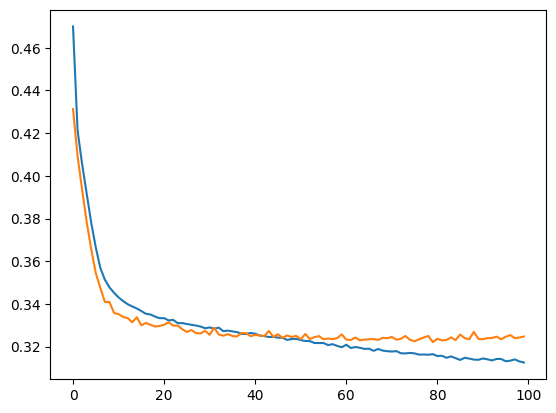

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

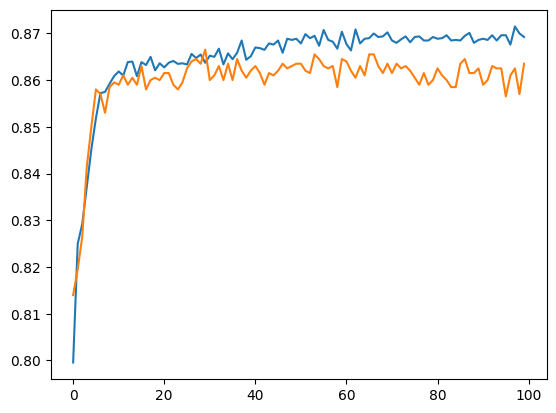

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])